#自己相関
『Rによる計量経済学』第5章「自己相関」をPythonで実行する。  
テキスト付属データセット(「k0501.csv」等)については出版社サイトよりダウンロードしてください。  
また、以下の説明は本書の一部を要約したものですので、より詳しい説明は本書を参照してください。   

In [1]:
%matplotlib inline

In [2]:
# -*- coding:utf-8 -*-
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###例題5-1

In [3]:
# データ読み込み
data = pd.read_csv('example/k0501.csv')
data

,i,X,Y
0,1,1,1
1,2,2,3
2,3,3,4
3,4,4,5
4,5,5,4
5,6,6,6
6,7,7,7
7,8,8,8
8,9,9,10
9,10,10,10


In [4]:
# 説明変数設定
X = data[['X']]
X = sm.add_constant(X)
X

,const,X
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6
6,1,7
7,1,8
8,1,9
9,1,10


In [5]:
# 被説明変数設定
Y = data['Y']
Y

0     1
1     3
2     4
3     5
4     4
5     6
6     7
7     8
8    10
9    10
Name: Y, dtype: int64

In [6]:
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     153.2
Date:                Sun, 19 Jul 2015   Prob (F-statistic):           1.69e-06
Time:                        04:02:41   Log-Likelihood:                -9.5470
No. Observations:                  10   AIC:                             23.09
Df Residuals:                       8   BIC:                             23.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5333      0.480      1.111      0.2

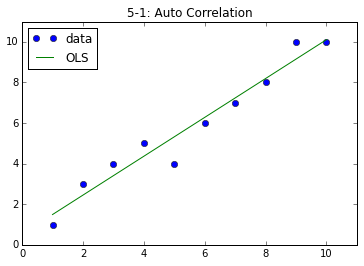

In [7]:
# グラフ生成
plt.plot(data["X"], data["Y"], 'o', label="data")
plt.plot(data["X"], results.fittedvalues, label="OLS")
plt.xlim(min(data["X"])-1, max(data["X"])+1)
plt.ylim(min(data["Y"])-1, max(data["Y"])+1)
plt.title('5-1: Auto Correlation')
plt.legend(loc=2)
plt.show()

Durbin-Watson: 2.029となり、2に近い値であり、自己相関がないと結論出来る。  
DW統計量に対応するP値を求めることがPythonではおそらくできない(Excelでも出来ない)ため、[ダービン=ワトソン統計量の分布表](http://www.econ.nagoya-cu.ac.jp/~kamiyama/siryou/regress/dw-table.html)を利用して有意性の検定を行います。  

この場合、標本の大きさ=10, 定数項を除いた説明変数の数=1なので、有意水準1%において、下限分布ではDW=0.604, 上限分布ではDW=1.001が有意となる境界、有意水準5%において、下限分布ではDW=0.879, 上限分布ではDW=1.320が有意となる境界です。(詳しくは本書の表を参考にしてください。)

###例題5-2

In [8]:
# データ読み込み
data = pd.read_csv('example/k0502.csv')
data

,i,X,Y
0,1,1.0,2.0
1,2,2.5,3.5
2,3,3.0,3.5
3,4,3.0,4.0
4,5,5.0,5.5
5,6,5.5,5.0
6,7,6.5,5.0
7,8,7.5,6.5
8,9,9.5,8.5
9,10,10.5,10.0


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     136.2
Date:                Sun, 19 Jul 2015   Prob (F-statistic):           2.65e-06
Time:                        04:02:41   Log-Likelihood:                -8.0714
No. Observations:                  10   AIC:                             20.14
Df Residuals:                       8   BIC:                             20.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2739      0.398      3.197      0.0

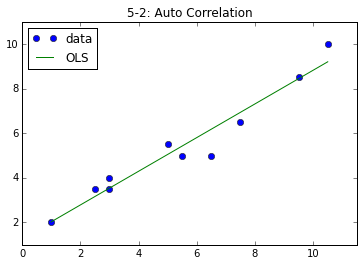

In [9]:
# 説明変数設定
X = data[['X']]
X = sm.add_constant(X)
# 被説明変数設定
Y = data['Y']
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())
# グラフ生成
plt.plot(data["X"], data["Y"], 'o', label="data")
plt.plot(data["X"], results.fittedvalues, label="OLS")
plt.xlim(min(data["X"])-1, max(data["X"])+1)
plt.ylim(min(data["Y"])-1, max(data["Y"])+1)
plt.title('5-2: Auto Correlation')
plt.legend(loc=2)
plt.show()

DW=1.094となり、上限分布において有意水準5%でも帰無仮説を棄却することができ、自己相関が存在すると結論することができる。

###例題5-3
変数変換によって自己相関に対処する方法を考える。  

In [10]:
data['dX'] = np.nan
data['dY'] = np.nan
for i in range(len(data)):
    if i == 0:
        data['dX'][i] = np.nan
        data['dY'][i] = np.nan
    else:
        data['dX'][i] = data['X'][i] - data['X'][i-1]
        data['dY'][i] = data['Y'][i] - data['Y'][i-1]
data

,i,X,Y,dX,dY
0,1,1.0,2.0,NaN,NaN
1,2,2.5,3.5,1.5,1.5
2,3,3.0,3.5,0.5,0.0
3,4,3.0,4.0,0.0,0.5
4,5,5.0,5.5,2.0,1.5
5,6,5.5,5.0,0.5,-0.5
6,7,6.5,5.0,1.0,0.0
7,8,7.5,6.5,1.0,1.5
8,9,9.5,8.5,2.0,2.0
9,10,10.5,10.0,1.0,1.5


                            OLS Regression Results                            
Dep. Variable:                     dY   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     7.945
Date:                Sun, 19 Jul 2015   Prob (F-statistic):             0.0258
Time:                        04:02:42   Log-Likelihood:                -7.8155
No. Observations:                   9   AIC:                             19.63
Df Residuals:                       7   BIC:                             20.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1194      0.419     -0.285      0.7

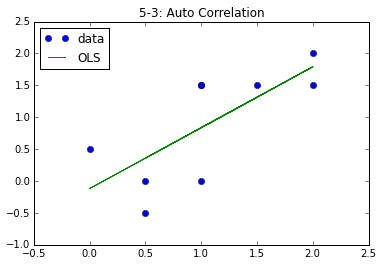

In [11]:
# 説明変数設定
X = data['dX'][1:]
X = sm.add_constant(X)
# 被説明変数設定
Y = data['dY'][1:]
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())
# グラフ生成
plt.plot(data["dX"], data["dY"], 'o', label="data")
plt.plot(data["dX"][1:], results.fittedvalues, label="OLS")
plt.xlim(min(data["dX"][1:])-0.5, max(data["dX"][1:])+0.5)
plt.ylim(min(data["dY"][1:])-0.5, max(data["dY"][1:])+0.5)
plt.title('5-3: Auto Correlation')
plt.legend(loc=2)
plt.show()